In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

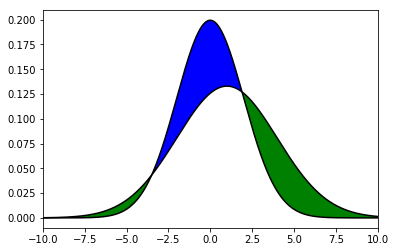

In [44]:
dx = 0.0001
x_axis = np.arange(-20, 20, dx)
# probability density functions
dist_a = stats.norm.pdf(x_axis, 0, 2)
dist_b = stats.norm.pdf(x_axis, 1, 3)
plt.plot(x_axis, dist_a, c='black')
plt.plot(x_axis, dist_b, c='black')
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b>=dist_a, facecolor='green', interpolate=True)
plt.fill_between(x_axis, dist_a, dist_b, where=dist_b<=dist_a, facecolor='blue', interpolate=True)
plt.xlim([-10,10]);

### Kullback-Leibler divergence

$q(x)$ model distribution <br>
$p(x)$ actual distribution

$D_{KL}(q||p)=\int q(x)\log\left(\frac{q(x)}{p(x)}\right)dx$<br>
On the discrete<br>
$D_{KL}(q||p)=\sum_i q(i)\log\left(\frac{q(i)}{p(i)}\right)$

KL-divergence is asymmetric! Moreover when p(x) is small the KL-divergence grows rapidly if $q(x)$ is not small. So, if you’re choosing $q(x)$ to minimize $D_{KL}(q||p)$, it's very improbable that $q(x)$ will assign a lot of mass on regions where $p(x)$ is near zero.

In [45]:
# KL from scipy
stats.entropy(dist_a, dist_b), stats.entropy(dist_b, dist_a)

(0.18324288576469003, 0.344534888317247)

In [46]:
# dist_a is the model distribution
kl_a = (dist_a * np.log(dist_a / dist_b)).sum() * dx
print('KL_a = %8.7f' % kl_a)

# dist_b is the model distribution
kl_b = (dist_b * np.log(dist_b / dist_a)).sum() * dx
print('KL_b = %8.7f' % kl_b)

KL_a = 0.1832429
KL_b = 0.3445349


### Jensen-Shannon Divergence

$D_{JS}(q||p) = \frac{1}{2}D_{KL}(q||\frac{p + q}{2}) + \frac{1}{2}D_{KL}(p||\frac{p + q}{2})$

This is symmetric and solve the problem of small $p(x)$